In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

from scipy.stats import beta
import numpy as np


In [2]:
%matplotlib ipympl

def plot_slider_animation(alpha_estimates_list, 
                        beta_estimates_list, 
                        min_u1s_list, 
                        min_u2s_list, 
                        min_u3s_list, 
                        current_u1s_list,
                        first_frame, last_frame,
                        y_min=0, y_max=100, x_min=0, x_max=0.3):
    
    framed_time=slice(first_frame, last_frame)
    
    frame_data_list = list(zip(alpha_estimates_list[framed_time], beta_estimates_list[framed_time],
                min_u1s_list[framed_time], min_u2s_list[framed_time], min_u3s_list[framed_time],
                current_u1s_list[framed_time], 
                range(first_frame, last_frame)))
    
    
    
    a_process, b_process, min_u1, min_u2, min_u3, current_u1, start_time = frame_data_list[0]
    end_time = frame_data_list[-1][-1]
    
    fig, ax = plt.subplots(figsize=(15,7))
    
    if (a_process is not None) and (b_process is not None):
        x_process = np.linspace(beta.ppf(0.001, a_process, b_process),beta.ppf(0.999, a_process, b_process), 1000)
        y_process = beta.pdf(x_process, a_process, b_process)
        line_process = ax.plot(x_process, y_process, 'b-', label='distance do reference distribution')[0]
    else:
        line_process = ax.plot([], [], 'b-', label='distance to reference distribution')[0]
    
    if current_u1 is not None:    
        u1_process = ax.axvline(current_u1, ymin=0, ymax= beta.pdf(current_u1, a_process, b_process), color="blue", linestyle="dashdot", label='current u1')
    else:
        u1_process = ax.axvline(0, ymin=0, ymax= 0, color="blue", linestyle="dashdot")
        
    if min_u1 is not None:    
        u1_marker = ax.plot([min_u1], [0], marker='^', markersize=12, color="green", alpha=0.5, label="u1_threshold")
        u2_marker = ax.plot([min_u2], [0], marker='^', markersize=12, color="orange", alpha=0.5, label="u2_threshold")
        u3_marker = ax.plot([min_u3], [0], marker='^', markersize=12, color="red", alpha=0.5, label="u3_threshold")
    else:
        u1_marker = ax.plot([], [], marker='^', markersize=12, color="green", alpha=0.5, label="u1_threshold")
        u2_marker = ax.plot([], [], marker='^', markersize=12, color="orange", alpha=0.5, label="u2_threshold")
        u3_marker = ax.plot([], [], marker='^', markersize=12, color="red", alpha=0.5, label="u3_threshold")
    
    ax.set(xlim=(x_min, x_max), xlabel='Values of Random Variable X (0, 1)',
        ylim=(y_min,y_max), ylabel='Probability density', title='Beta Distribution of pdf distances to reference distribution')
    time_legend = ax.text(0.9, 0.95, f'time: {start_time}', ha='left', va='top', transform=ax.transAxes,
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
    ax.legend(loc='lower right')

    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)

    # Make a horizontal slider to control the frequency.
    axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
    freq_slider = Slider(
        ax=axfreq,
        label='Time step',
        valmin=start_time,
        valmax=end_time,
        valinit=start_time,
    )
        
    # Plot the beta distribution
    def update(val):
        
        idx = int(freq_slider.val-start_time)
        a_process, b_process, min_u1, min_u2, min_u3, current_u1, time = frame_data_list[idx]

        if (a_process is not None) and (b_process is not None):
            x_process = np.linspace(beta.ppf(0.001, a_process, b_process),beta.ppf(0.999, a_process, b_process), 1000)
            y_process = beta.pdf(x_process, a_process, b_process)
            line_process.set_data(x_process, y_process)
        else:
            line_process.set_data([], [])
            
        if current_u1 is not None:    
            u1_process.set_xdata([current_u1, current_u1])
            u1_process.set_ydata([0,beta.pdf(current_u1, a_process, b_process)])
        else:
            u1_process.set_xdata([0,0])
            u1_process.set_ydata([0,0])
            
        if min_u1 is not None:    
            u1_marker[0].set_xdata([min_u1])
            u1_marker[0].set_ydata([0])
            u2_marker[0].set_xdata([min_u2])
            u2_marker[0].set_ydata([0])
            u3_marker[0].set_xdata([min_u3])
            u3_marker[0].set_ydata([0])
        else:
            u1_marker[0].set_xdata([])
            u1_marker[0].set_ydata([])
            u2_marker[0].set_xdata([])
            u2_marker[0].set_ydata([])
            u3_marker[0].set_xdata([])
            u3_marker[0].set_ydata([])
        
        time_legend.set_text(f'time: {time}')
        
        fig.canvas.draw_idle()
        
    # register the update function with each slider
    freq_slider.on_changed(update)
    # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
    resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', hovercolor='0.975')
    
    def reset(event):
        freq_slider.reset()
    
    button.on_clicked(reset)

    plt.show()

In [3]:
from random import gauss

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def gaussian_histogram(mu:float, sigma:float, sample_size:int):
    bin_edges = np.linspace(-10,10,21)
    histogram, _ = np.histogram([gauss(mu, sigma) for _ in range(sample_size)], bins=bin_edges, density=True)
    return pd.Series(histogram)

In [5]:
gaussian_histogram(0, 1, 10000)

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
5     0.0000
6     0.0015
7     0.0217
8     0.1357
9     0.3464
10    0.3357
11    0.1350
12    0.0225
13    0.0014
14    0.0001
15    0.0000
16    0.0000
17    0.0000
18    0.0000
19    0.0000
dtype: float64

In [6]:
from src.change_detector import detect_response
from src.change_detector.corrected_change_detector import PDFChangeDetector


change_detector = PDFChangeDetector()

for i in range(500):
    new_pdf = gaussian_histogram(0, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    print("Status:", detect_response.state.name, "| Alpha:", detect_response.alpha_estimate,"| Beta:", detect_response.beta_estimate,"\n***\n")

current process run_order: 1
Status: LEARNING | Alpha: None | Beta: None 
***

current process run_order: 2
Status: LEARNING | Alpha: None | Beta: None 
***

current process run_order: 3
Status: LEARNING | Alpha: 349.3498329194563 | Beta: 30730.107857179617 
***

current process run_order: 4
Status: LEARNING | Alpha: 380.48743043272964 | Beta: 33039.04916814083 
***

current process run_order: 5
Status: LEARNING | Alpha: 469.35447546932306 | Beta: 40863.28801491176 
***

current process run_order: 6
Status: LEARNING | Alpha: 213.20052179954075 | Beta: 18998.454425234824 
***

current process run_order: 7
Status: LEARNING | Alpha: 188.79073981055978 | Beta: 16570.399990320853 
***

current process run_order: 8
Status: LEARNING | Alpha: 150.21803897646313 | Beta: 13402.846045001432 
***

current process run_order: 9
Status: LEARNING | Alpha: 78.18156445708907 | Beta: 6755.759506464095 
***

current process run_order: 10
Status: LEARNING | Alpha: 83.59985440007402 | Beta: 7274.27422168171

In [7]:
from src.change_detector.corrected_change_detector import PDFChangeDetector


change_detector_window = PDFChangeDetector(method="window")

for i in range(200):
    new_pdf = gaussian_histogram(0, 1, 10000)
    detect_response = change_detector_window.detect_change(new_pdf)
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate,
        "| Beta :", detect_response.beta_estimate,
        "\n***\n")

current process run_order: 1
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 2
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 3
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 4
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 5
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 6
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 7
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 8
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 9
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 10
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 11
Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 12
Status:  LEARNING | Alpha : None | Beta : None 
***

current proce

In [8]:
change_detector.current_process.__dict__

{'_monitor_method': <MonitorMethod.TRUNCATED: 0>,
 '_monitor_size': 100,
 'reference_PDF': 0     0.000000
 1     0.000000
 2     0.000000
 3     0.000000
 4     0.000000
 5     0.000035
 6     0.001365
 7     0.021385
 8     0.135200
 9     0.341390
 10    0.342085
 11    0.135730
 12    0.021515
 13    0.001270
 14    0.000025
 15    0.000000
 16    0.000000
 17    0.000000
 18    0.000000
 19    0.000000
 dtype: float64,
 'alpha_fading_pdf': 0     0.0000
 1     0.0000
 2     0.0000
 3     0.0000
 4     0.0000
 5     0.0001
 6     0.0010
 7     0.0194
 8     0.1393
 9     0.3434
 10    0.3393
 11    0.1348
 12    0.0206
 13    0.0021
 14    0.0000
 15    0.0000
 16    0.0000
 17    0.0000
 18    0.0000
 19    0.0000
 dtype: float64,
 'estimated_alpha': 22.093580533505165,
 'estimated_beta': 1731.5172618231286,
 'run_order': 500,
 'dist_geo_mean': 0.0123172933574912,
 'complementary_dist_geo_mean': 0.987397499348184,
 'min_u1': 0.01367453372414067,
 'min_u2': 0.0159930476228106,
 'min_

In [9]:
from src.change_detector.corrected_change_detector import PDFChangeDetector

change_detector = PDFChangeDetector(reference_size=30)

detection_status_list = []
alpha_estimates_list = []
beta_estimates_list = []
u1_min_list = []
u2_min_list = []
u3_min_list = []
current_u1_list = []

for i in range(300):
    new_pdf = gaussian_histogram(2, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")


for i in range(100):
    new_pdf = gaussian_histogram(2.1, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")

current process run_order: 1
Status:  LEARNING | Alpha : None | Beta None 
***

current process run_order: 2
Status:  LEARNING | Alpha : None | Beta None 
***

current process run_order: 3
Status:  LEARNING | Alpha : 25.651050839465015 | Beta 2736.250934967521 
***

current process run_order: 4
Status:  LEARNING | Alpha : 29.052550254330598 | Beta 3224.814974865958 
***

current process run_order: 5
Status:  LEARNING | Alpha : 30.38560460875237 | Beta 3492.617091244606 
***

current process run_order: 6
Status:  LEARNING | Alpha : 24.67962104270449 | Beta 2680.2952707680092 
***

current process run_order: 7
Status:  LEARNING | Alpha : 13.76598773401162 | Beta 1358.9480408429167 
***

current process run_order: 8
Status:  LEARNING | Alpha : 14.725654206264291 | Beta 1415.4789193832817 
***

current process run_order: 9
Status:  LEARNING | Alpha : 16.499105734843383 | Beta 1579.2842128735074 
***

current process run_order: 10
Status:  LEARNING | Alpha : 17.955964502114277 | Beta 1699.1

In [10]:
data = pd.DataFrame([detection_status_list, alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list]).T

In [11]:
data

,0,1,2,3,4,5,6
0,LEARNING,None,None,None,None,None,None
1,LEARNING,None,None,None,None,None,None
2,LEARNING,25.651051,2736.250935,None,None,None,None
3,LEARNING,29.05255,3224.814975,None,None,None,None
4,LEARNING,30.385605,3492.617091,None,None,None,None
...,...,...,...,...,...,...,...
395,IN_CONTROL,16.687636,1360.011191,0.013963,0.017426,0.02157,0.015024
396,IN_CONTROL,16.844213,1371.646356,0.013963,0.017426,0.02157,0.015023
397,IN_CONTROL,16.959742,1378.928353,0.013963,0.017426,0.02157,0.015036
398,IN_CONTROL,16.918555,1371.358827,0.013963,0.017426,0.02157,0.015085


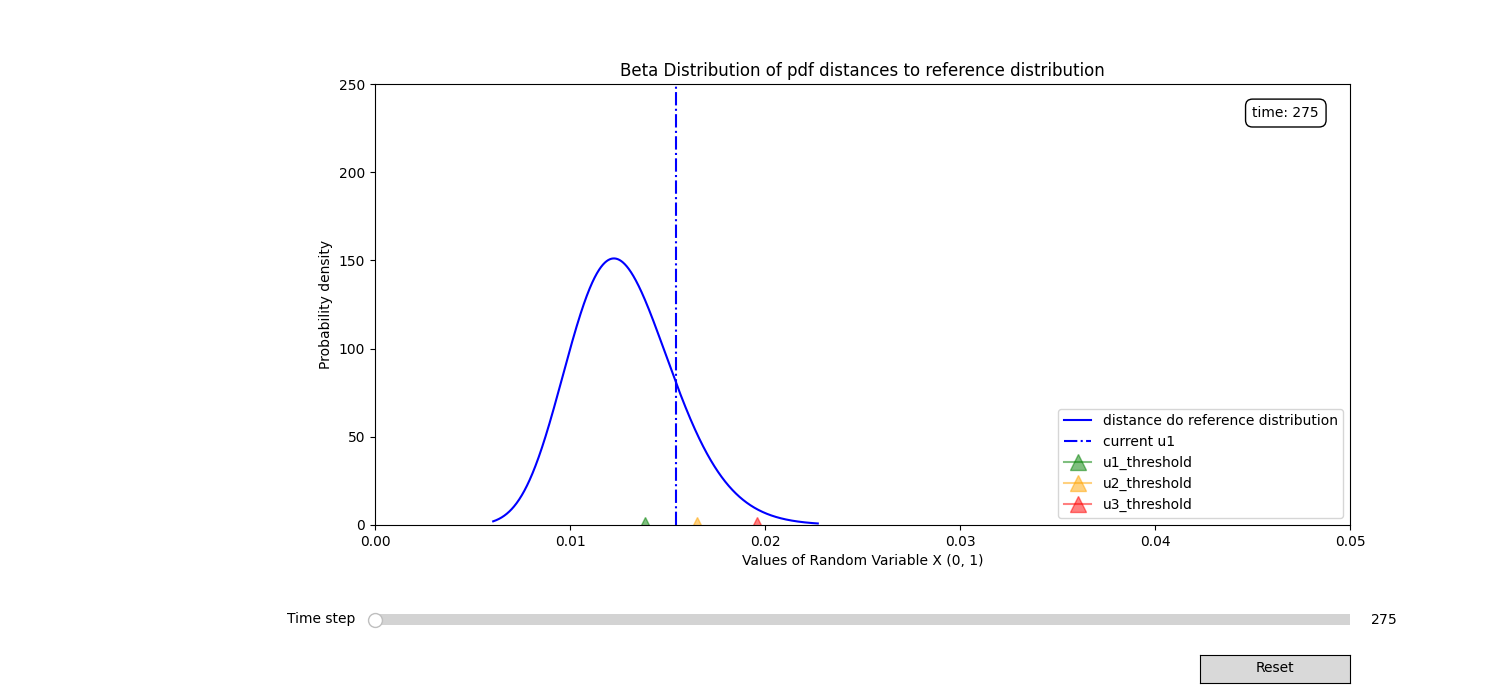

In [12]:
plot_slider_animation(alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list, first_frame=275, last_frame=350, y_max=250, x_max=0.05)

In [13]:
change_detector = PDFChangeDetector(reference_size=30)

detection_status_list = []
alpha_estimates_list = []
beta_estimates_list = []
u1_min_list = []
u2_min_list = []
u3_min_list = []
current_u1_list = []

for i in range(500):
    new_pdf = gaussian_histogram(2, 1, 1000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")


for i in range(50):
    new_pdf = gaussian_histogram(2, 1.2, 1000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")

current process run_order: 1
Status:  LEARNING | Alpha : None | Beta None 
***

current process run_order: 2
Status:  LEARNING | Alpha : None | Beta None 
***

current process run_order: 3
Status:  LEARNING | Alpha : 687.8974154724165 | Beta 24326.642445779027 
***

current process run_order: 4
Status:  LEARNING | Alpha : 93.25168813270521 | Beta 3101.622418925755 
***

current process run_order: 5
Status:  LEARNING | Alpha : 79.06584420463604 | Beta 2541.9198182845944 
***

current process run_order: 6
Status:  LEARNING | Alpha : 71.22142230646334 | Beta 2225.979967888717 
***

current process run_order: 7
Status:  LEARNING | Alpha : 60.46339075081983 | Beta 1834.700731451884 
***

current process run_order: 8
Status:  LEARNING | Alpha : 30.67565249992526 | Beta 974.4560772011856 
***

current process run_order: 9
Status:  LEARNING | Alpha : 29.377064886168448 | Beta 907.8651285402451 
***

current process run_order: 10
Status:  LEARNING | Alpha : 24.92993102284818 | Beta 742.71846591

In [14]:
data = pd.DataFrame([detection_status_list, alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list]).T

In [15]:
data

,0,1,2,3,4,5,6
0,LEARNING,None,None,None,None,None,None
1,LEARNING,None,None,None,None,None,None
2,LEARNING,687.897415,24326.642446,None,None,None,None
3,LEARNING,93.251688,3101.622419,None,None,None,None
4,LEARNING,79.065844,2541.919818,None,None,None,None
...,...,...,...,...,...,...,...
545,IN_CONTROL,24.978569,589.056796,0.047135,0.056024,0.066314,0.048556
546,IN_CONTROL,25.418625,600.663591,0.047135,0.056024,0.066314,0.048393
547,IN_CONTROL,25.521099,605.374898,0.047135,0.056024,0.066314,0.048203
548,IN_CONTROL,25.979807,615.136048,0.047135,0.056024,0.066314,0.048219


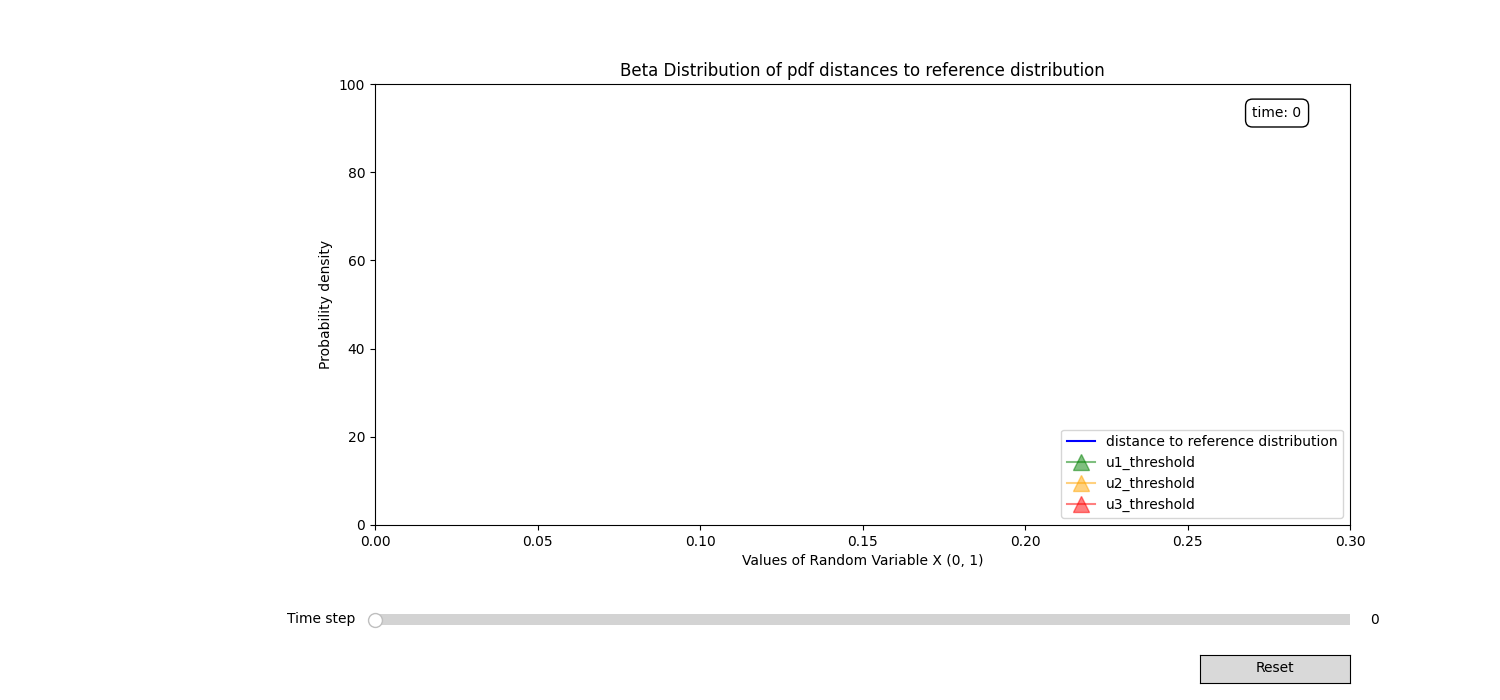

In [16]:
plot_slider_animation(alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list, first_frame=0, last_frame=550)